In [1]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import scipy.stats as ss 

In [2]:
claims = pd.read_csv(r"C:\Users\ACER\Downloads\python assingments\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv")
cust_demo = pd.read_csv(r"C:\Users\ACER\Downloads\python assingments\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

In [3]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
cust_demo

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [5]:
final = pd.merge(left=cust_demo, right=claims, how="inner", left_on="CUST_ID", right_on="customer_id" )

In [6]:
final.drop({"customer_id"}, axis=1, inplace=True)


In [7]:
final.rename({"CUST_ID":"customer_id"}, axis=1, inplace=True)

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [8]:
final

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [9]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(1), int64(2), object(12)
me

In [10]:
final.DateOfBirth = final.DateOfBirth.astype(np.datetime64)
final.claim_date = final.claim_date.astype(np.datetime64)

In [11]:
final.Contact = [i.replace("-","")for i in final.Contact]
final.Contact = final.Contact.astype(np.int64)

In [12]:
final.claim_amount = final.claim_amount.astype("str")
final.claim_amount = [i.replace("$", "")for i in final.claim_amount]
final.claim_amount = final.claim_amount.astype("float")

In [13]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   int64         
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign 


## Done above  

## 4. Of all the injury claims, some of them have gone unreported with thepolice. Create an alert flag (1,0) for all such claims.

In [14]:
final.police_report = np.where(final.police_report == "No", 0 ,np.where(final.police_report =="Yes",1,final.police_report) )

In [15]:
final

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764,Driver error,2017-11-27,Auto,0,Material only,2980.0,1.0,No
1,75740424,Female,2070-01-13,ME,2655431264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022,Other driver error,2018-02-02,Auto,0,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412,Driver error,2018-04-04,Auto,0,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401,Natural causes,2018-06-17,Auto,0,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4594254319,Platinum,62020796,Other driver error,2018-09-06,Auto,1,Material only,1770.0,1.0,No
1081,42364152,Female,1996-07-07,ID,5294621635,Silver,63269067,Other causes,2017-05-09,Home,0,Material only,2800.0,1.0,No
1082,19888166,Male,1990-04-11,WI,7126519613,Gold,22690595,Other driver error,2017-05-15,Auto,1,Injury only,33080.0,2.0,No
1083,11256802,Female,2064-10-22,LA,4693455617,Silver,12376894,Other driver error,2017-04-18,Auto,0,Material only,2840.0,4.0,No


## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 

## Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [16]:
final["claim_year"]= final.claim_date.dt.year
final["claim_day"]=final.claim_date.dt.day
final["claim_month"]=final.claim_date.dt.month

In [17]:
final.sort_values(["claim_year","claim_month", "claim_day"], ascending=[False,True,True],inplace=True)

In [18]:
final.customer_id.duplicated().any()



True

In [19]:
final.drop_duplicates("customer_id",inplace=True)

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [20]:
final.count()

customer_id            1078
gender                 1078
DateOfBirth            1078
State                  1078
Contact                1078
Segment                1078
claim_id               1078
incident_cause         1078
claim_date             1078
claim_area             1078
police_report          1078
claim_type             1078
claim_amount           1013
total_policy_claims    1068
fraudulent             1078
claim_year             1078
claim_day              1078
claim_month            1078
dtype: int64

In [21]:
##claim_amount           1013
##total_policy_claims    1068

In [22]:
final.claim_amount.mean()

12503.562191510366

In [23]:
final.claim_amount.fillna(12503.56, inplace=True )

In [24]:
final.total_policy_claims.mode()

0    1.0
dtype: float64

In [25]:
final.total_policy_claims.fillna(1.0, inplace=True)

## 7. Calculate the age of customers in years. Based on the age, categorize the 
## customers according to the below criteria

### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60


In [26]:
final["birth_year"]= final.DateOfBirth.dt.year


In [27]:
final.birth_year = final.birth_year.astype("str")

In [28]:
final.birth_year = [i.replace("20",'19') for i in final.birth_year]

In [29]:
final.birth_year = final.birth_year.astype("int")

In [30]:
final["Age"]=2021- final.birth_year

In [31]:
final.Age
final.Age = final.Age.astype("str")

In [32]:
final["Age_category"]= np.where(final.Age <"18","Children",np.where(((final.Age >="18")&(final.Age <"30")),"Youth",np.where(((final.Age >="30")&(final.Age <"60")),"Adult","Senior")) )

In [33]:
final.Age_category

175     Senior
185      Adult
191      Adult
308      Youth
561      Adult
         ...  
753      Adult
901      Adult
937      Adult
1021     Adult
1070     Adult
Name: Age_category, Length: 1078, dtype: object

## 8. What is the average amount claimed by the customers from various segments?


In [34]:
final.groupby(["Age_category"]).agg(avg_amount_claim = ("claim_amount", "mean"))


,avg_amount_claim
Age_category,
Adult,12606.277669
Senior,12935.026531
Youth,12057.203550


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [35]:
## we need claims between  10sep2018 to 30sep2018 

final.drop({"claim_month"}, axis=1, inplace=True)

In [36]:
final["claim_month"]= final.claim_date.dt.strftime("%B")

In [37]:
final_oct2018 = final[((final.claim_year == 2018) & (final.claim_month =="October")& ((final.claim_day>9) & (final.claim_day<31)))]

In [38]:
final_oct2018.groupby("incident_cause").agg(Total_claim = ("claim_amount","sum"))

,Total_claim
incident_cause,
Crime,20690.00
Driver error,112867.12
Natural causes,18663.56
Other causes,144937.50
Other driver error,90622.56


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [39]:
final_tx_de_ak = final[(final.State == "TX")|(final.State == "DE")|(final.State == "AK")]

In [40]:
final_tx_de_ak.incident_cause.value_counts()
## Other driver error, Driver error          


Driver error          22
Other causes          18
Natural causes        14
Other driver error    13
Crime                  3
Name: incident_cause, dtype: int64

In [41]:
final_tx_de_ak[(final_tx_de_ak.incident_cause=="Driver error ")|(final_tx_de_ak.incident_cause=="Other driver error")|(final_tx_de_ak.Age_category == "Adult")].count()

customer_id            56
gender                 56
DateOfBirth            56
State                  56
Contact                56
Segment                56
claim_id               56
incident_cause         56
claim_date             56
claim_area             56
police_report          56
claim_type             56
claim_amount           56
total_policy_claims    56
fraudulent             56
claim_year             56
claim_day              56
birth_year             56
Age                    56
Age_category           56
claim_month            56
dtype: int64

In [42]:
## 56 customer 

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [43]:
plot_m_f_segment = pd.crosstab(final.gender, final.Segment, values= final.claim_amount ,aggfunc="sum")


<AxesSubplot:xlabel='gender'>

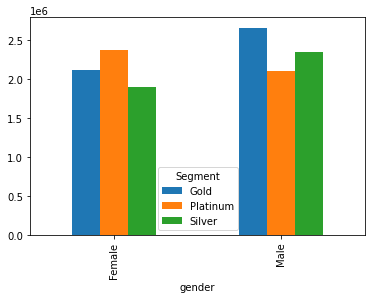

In [44]:
plot_m_f_segment.plot.bar()

<AxesSubplot:title={'center':'Male'}>

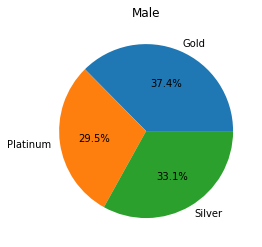

In [45]:
plot_m_f_segment.loc["Male"].plot.pie(ylabel='', autopct='%1.1f%%', title = "Male")


<AxesSubplot:title={'center':'Female'}>

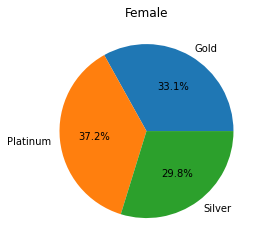

In [46]:
plot_m_f_segment.loc["Female"].plot.pie(ylabel='', autopct='%1.1f%%', title = "Female")

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using abar chart

In [47]:
final_m_f_driver = pd.crosstab(final.gender, final.incident_cause)

In [48]:
final_m_f_driver["Total_driver_related"]= final_m_f_driver["Driver error"] + final_m_f_driver["Other driver error"]

<AxesSubplot:xlabel='gender'>

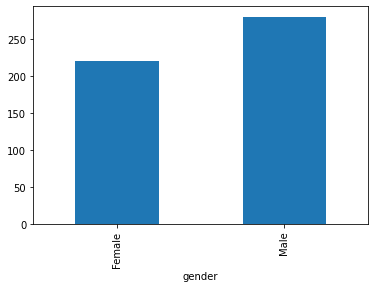

In [49]:
final_m_f_driver.Total_driver_related.plot.bar()

In [50]:
final_m_f_driver

incident_cause,Crime,Driver error,Natural causes,Other causes,Other driver error,Total_driver_related
gender,,,,,,
Female,58,72,92,156,149,221
Male,50,186,93,127,95,281


In [51]:
## male gender had claimed the most for any type of driver related issues

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [52]:
final_fraud = pd.crosstab(final.Age_category,final.fraudulent)
final_fraud

fraudulent,No,Yes
Age_category,,
Adult,609,189
Senior,37,12
Youth,186,45


<AxesSubplot:xlabel='Age_category'>

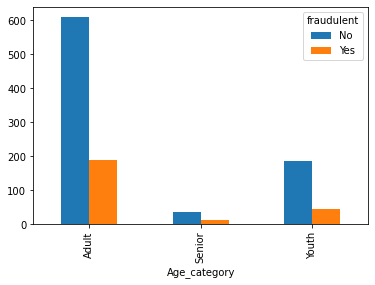

In [53]:
final_fraud.plot.bar()

In [54]:
## Adult age group had maximum fraudulent policy claims

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [55]:
final_monthly_trend = pd.crosstab(final.claim_month , final.claim_year , values=final.claim_amount, aggfunc="sum")

In [56]:
final_monthly_trend = final_monthly_trend.loc[['January','February','March', 'April', 'May',  'June','July', 'August','September','October', 'November', 'December']]

In [57]:
final_monthly_trend

claim_year,2017,2018
claim_month,,
January,608021.68,721841.74
February,631460.12,536459.12
March,615580.12,704679.18
April,747977.56,542590.06
May,546747.18,567728.80
June,560145.56,718895.80
July,790876.24,588456.30
August,431620.12,479682.56
September,459481.92,521496.68


<AxesSubplot:xlabel='claim_month'>

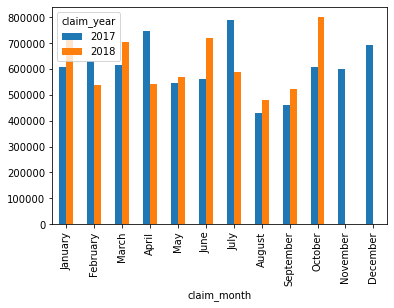

In [58]:
final_monthly_trend.plot.bar()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.



In [59]:
final_new = final[["gender","Age_category","fraudulent","claim_amount"]]
final_m_f_claim_fraud = final_new.pivot_table(index=["gender","Age_category"], columns="fraudulent", fill_value="claim_amount",aggfunc="sum")

<AxesSubplot:ylabel='gender,Age_category'>

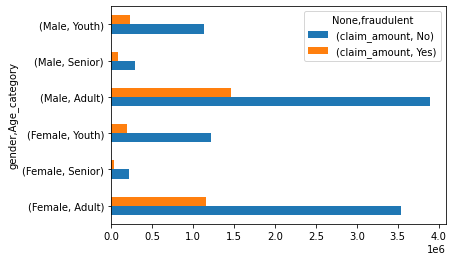

In [60]:
final_m_f_claim_fraud.plot.barh()

## 16. Is there any similarity in the amount claimed by males and females?


<AxesSubplot:xlabel='gender'>

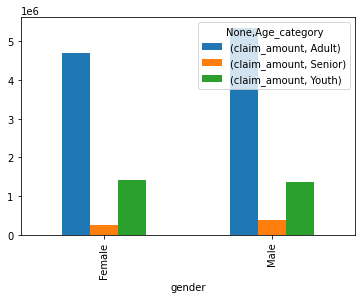

In [61]:
final_new.pivot_table(index=("gender"),columns="Age_category",fill_value="claim_amount",aggfunc="sum").plot.bar()

In [62]:
### amount cliamed by male and female in different category are almost similar 

In [63]:
female_claim = final.claim_amount[final.gender == "Female"]
male_claim = final.claim_amount[final.gender == "Male"]


In [64]:
ss.ttest_ind(a=male_claim, b=female_claim)

## 1)  H0 = If avg_male_claim = if avg_female_claim  
##     Ha = f avg_male_claim != if avg_female_claim 

## 2) confidence level --> 95% 

## 3) criteria ----> as if p_value> 0.05 we can reject H0 and can accept Ha hypothesis , but if p_value < 0.05 we can't 
## reject H0 hypothesis 


### p-value is >0.05 we can ignore the null hypothesis and accept alternative hypothesis 

Ttest_indResult(statistic=0.9602950846673968, pvalue=0.3371224576361618)

## 17. Is there any relationship between age category and segment?


In [ ]:
age_segment = pd.crosstab(final.Segment, final.Age_category)

In [71]:
print(ss.chi2_contingency(age_segment))

(1.2651334835621246, 0.8672627624214679, 4, array([[274.63636364,  16.86363636,  79.5       ],
       [267.23376623,  16.40909091,  77.35714286],
       [256.12987013,  15.72727273,  74.14285714]]))


In [69]:
## 1)  H0 = 0     there will be no relation between age and segment 
##     Ha !=0     there will be some relation between age and segment 
## 2) confidence level --> 95% 

## 3) criteria ----> as if p_value> 0.05 we can reject H0 and can accept Ha hypothesis , but if p_value < 0.05 we can't 
## reject H0 hypothesis 


### so, p-value is >0.05 we can ignore the null hypothesis and accept alternative hypothesis which means age and segment have 
### strong relationship. 

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was  10,000.


In [77]:
ss.ttest_1samp(a=final.claim_amount, popmean=10000)

Ttest_1sampResult(statistic=6.151995484223807, pvalue=1.0771184583352468e-09)

In [78]:
final.claim_amount.mean()

12503.562059369207

In [ ]:
## 1)  H0 = If avg_claim_amount = target_avg
##     Ha = If avg_claim_amount != target_avg

## 2) confidence level --> 95% 

## 3) criteria ----> as if p_value> 0.05 we can reject H0 and can accept Ha hypothesis , but if p_value < 0.05 we can't 
## reject H0 hypothesis 


### p-value is >0.05 we can ignore the null hypothesis and accept alternative hypothesis,whcih means the hypothisis is true
## 2017-18 shows a significant rise in claim amounts as compared to 2016-17 

## 19. Is there any difference between age groups and insurance claims?

In [86]:
final.Age = final.Age.astype("int")

In [87]:
ss.pearsonr(final.claim_amount,final.Age)

(-0.0031098556751542996, 0.9187666772012257)

In [ ]:
## 1)  H0 = 0     there will be no relation between age and claim_amount
##     Ha !=0     there will be some relation between age and claim_amount 
## 2) confidence level --> 95% 

## 3) criteria ----> as if p_value> 0.05 we can reject H0 and can accept Ha hypothesis , but if p_value < 0.05 we can't 
## reject H0 hypothesis 


### so, p-value is >0.05 we can ignore the null hypothesis and accept alternative hypothesis which means age and claim_amount
### have relationship but it have week relationship . 

## 20. Is there any relationship between total number of policy claims and the claimed amount?


In [91]:
ss.f_oneway(final.total_policy_claims, final.claim_amount)

F_onewayResult(statistic=943.785231669524, pvalue=3.437634144725212e-172)

In [92]:
## 1)  H0 = 0     there will be no relation between total policy claim and claim_amount
##     Ha !=0     there will be some relation between total policy claim and claim_amount
## 2) confidence level --> 95% 

## 3) criteria ----> as if p_value> 0.05 we can reject H0 and can accept Ha hypothesis , but if p_value < 0.05 we can't 
## reject H0 hypothesis 


### so, p-value is >0.05 we can ignore the null hypothesis and accept alternative hypothesis which means total policy claim and claim_amount
### have relationship. 
